<a href="https://colab.research.google.com/github/ayyucedemirbas/Goodreads_data_visualization/blob/main/goodreads_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df_books = pd.read_csv("goodreads.csv")

In [3]:
df_books.head()

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies
0,18008678,What's in Your Genes?: From the Color of Your ...,Katie McKissick,"McKissick, Katie",NaN,"=""1440567646""","=""9781440567643""",5,3.94,Adams Media,...,2022/12/15,2021/04/11,bought,bought (#167),read,Konu çok eğlenceli bir şekilde anlatılmış anca...,NaN,NaN,2,0
1,890,Of Mice and Men,John Steinbeck,"Steinbeck, John",NaN,"=""0142000671""","=""9780142000670""",0,3.88,Penguin Books,...,NaN,2022/12/14,"to-read, bought","to-read (#313), bought (#168)",to-read,NaN,NaN,NaN,0,0
2,1633,Getting Things Done: The Art of Stress-Free Pr...,David Allen,"Allen, David",NaN,"=""0142000280""","=""9780142000281""",0,4.00,Penguin Group,...,NaN,2022/12/10,"to-read, to-buy","to-read (#312), to-buy (#71)",to-read,NaN,NaN,NaN,0,0
3,4069,Man's Search for Meaning,Viktor E. Frankl,"Frankl, Viktor E.","Harold S. Kushner, William J. Winslade, Isle L...","=""080701429X""","=""9780807014295""",5,4.37,Beacon Press,...,2022/12/10,2022/08/28,bought,bought (#164),read,NaN,NaN,NaN,1,0
4,88077,The Magic Mountain,Thomas Mann,"Mann, Thomas",John E. Woods,"=""0679772871""","=""9780679772873""",0,4.12,Vintage,...,NaN,2022/12/06,to-read,to-read (#311),to-read,NaN,NaN,NaN,0,0


In [4]:
df_books.columns

Index(['Book Id', 'Title', 'Author', 'Author l-f', 'Additional Authors',
       'ISBN', 'ISBN13', 'My Rating', 'Average Rating', 'Publisher', 'Binding',
       'Number of Pages', 'Year Published', 'Original Publication Year',
       'Date Read', 'Date Added', 'Bookshelves', 'Bookshelves with positions',
       'Exclusive Shelf', 'My Review', 'Spoiler', 'Private Notes',
       'Read Count', 'Owned Copies'],
      dtype='object')

In [5]:
index = df_books.index
number_of_rows = len(index)
print(number_of_rows)

504


In [6]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Book Id                     504 non-null    int64  
 1   Title                       504 non-null    object 
 2   Author                      504 non-null    object 
 3   Author l-f                  504 non-null    object 
 4   Additional Authors          191 non-null    object 
 5   ISBN                        504 non-null    object 
 6   ISBN13                      504 non-null    object 
 7   My Rating                   504 non-null    int64  
 8   Average Rating              504 non-null    float64
 9   Publisher                   480 non-null    object 
 10  Binding                     496 non-null    object 
 11  Number of Pages             481 non-null    float64
 12  Year Published              483 non-null    float64
 13  Original Publication Year   433 non

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


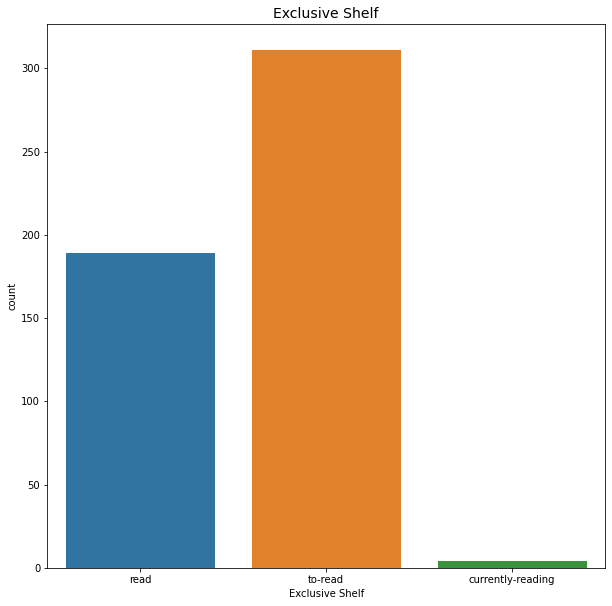

In [8]:
plt.figure(figsize=(10,10))
plt.title('Exclusive Shelf', fontsize = 14)
sns.countplot(df_books['Exclusive Shelf'])
plt.xticks(fontsize = 10)
plt.show()

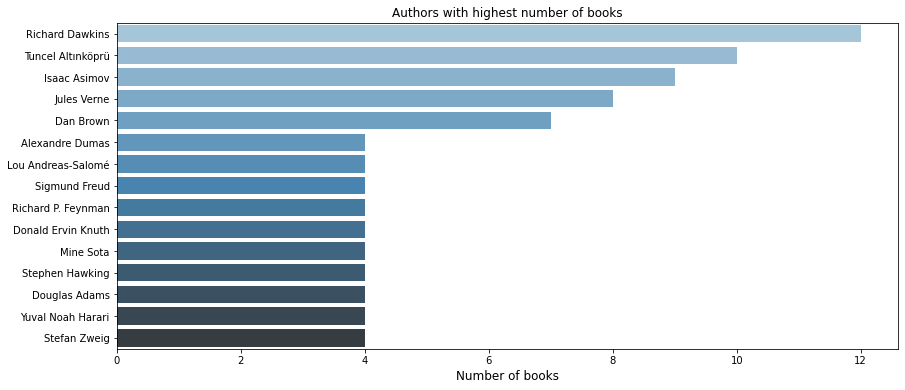

In [9]:
most_books = df_books['Author'].value_counts()[:15]
plt.figure(figsize = (14,6))
sns.barplot(x = most_books, y = most_books.index, palette = 'Blues_d')
plt.title('Authors with highest number of books')
plt.xlabel('Number of books', fontsize = 12)
plt.show()

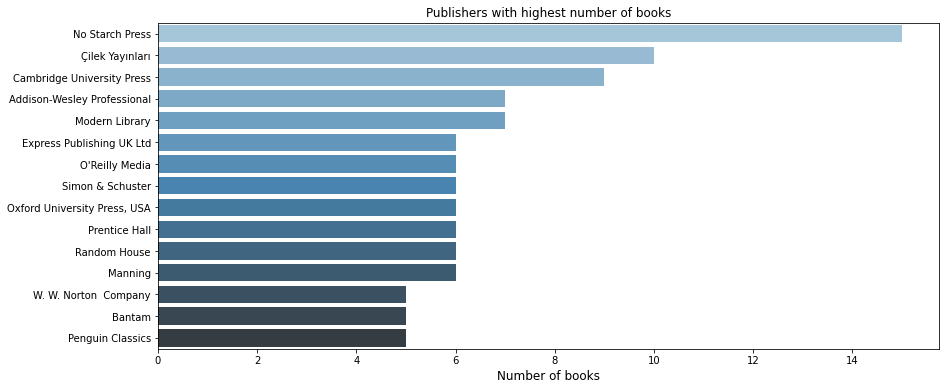

In [10]:
most_books = df_books['Publisher'].value_counts()[:15]
plt.figure(figsize = (14,6))
sns.barplot(x = most_books, y = most_books.index, palette = 'Blues_d')
plt.title('Publishers with highest number of books')
plt.xlabel('Number of books', fontsize = 12)
plt.show()

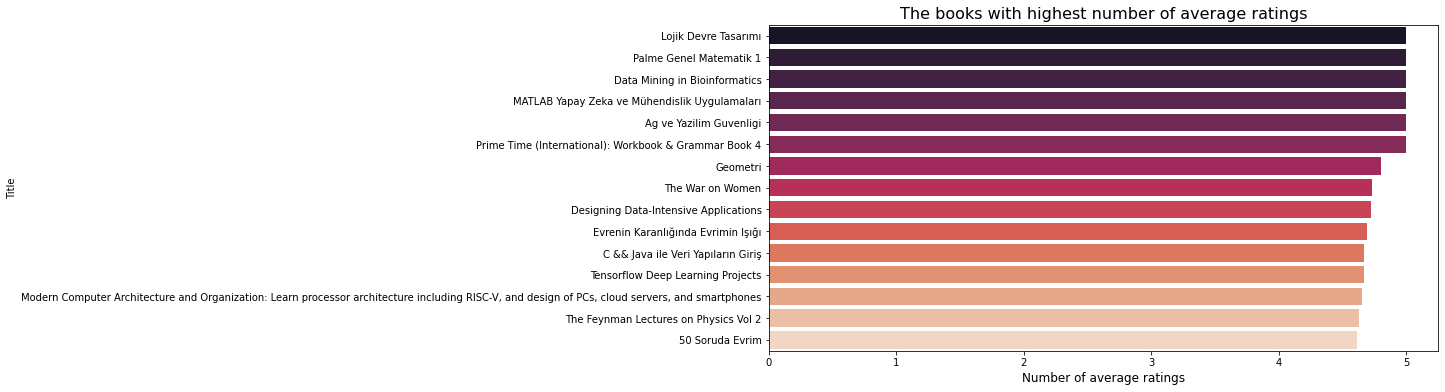

In [11]:
most_ratings = df_books[['Average Rating']].set_index(df_books['Title']).sort_values(by = 'Average Rating', ascending = False)[:15]
plt.figure(figsize = (12,6))
sns.barplot(x = most_ratings['Average Rating'], y = most_ratings.index, palette = 'rocket')
plt.yticks(fontsize = 10)
plt.xlabel('Number of average ratings', fontsize = 12)
plt.title('The books with highest number of average ratings', fontsize = 16)
plt.show()

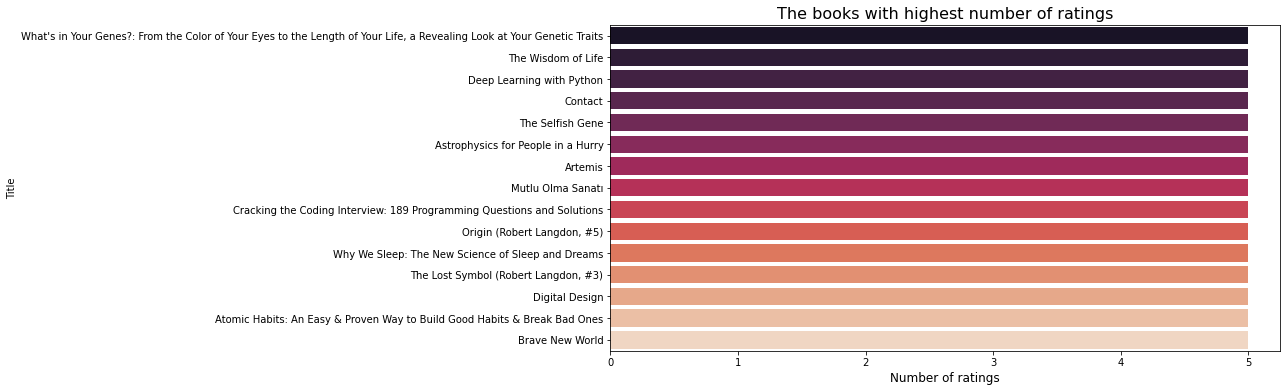

In [12]:
most_ratings = df_books[['My Rating']].set_index(df_books['Title']).sort_values(by = 'My Rating', ascending = False)[:15]
plt.figure(figsize = (12,6))
sns.barplot(x = most_ratings['My Rating'], y = most_ratings.index, palette = 'rocket')
plt.yticks(fontsize = 10)
plt.xlabel('Number of ratings', fontsize = 12)
plt.title('The books with highest number of ratings', fontsize = 16)
plt.show()

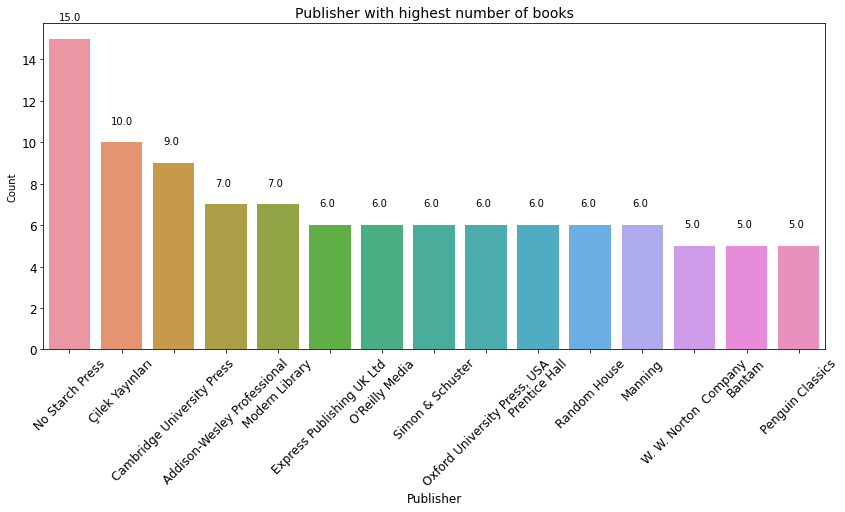

In [13]:
publisher = df_books['Publisher'].value_counts().head(15)
plt.figure(figsize = (14,6))
graph = sns.barplot(y = publisher, x = publisher.index)
plt.title('Publisher with highest number of books', fontsize = 14)
plt.xlabel('Publisher', fontsize = 12)
plt.ylabel('Count')
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/4., height + 0.9, height)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


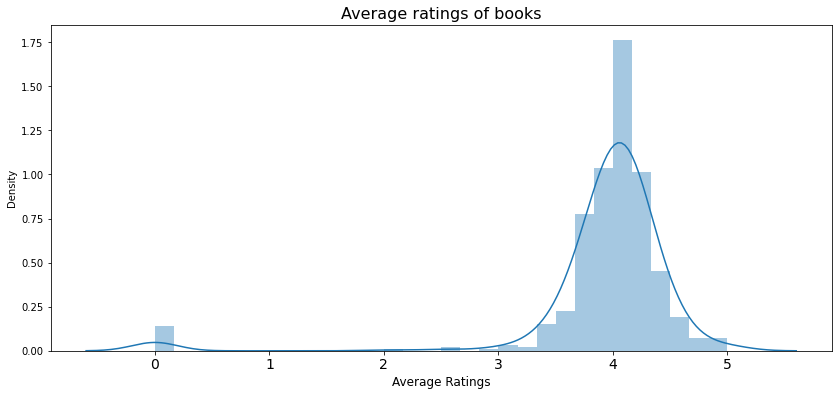

In [14]:
plt.figure(figsize = (14,6))
sns.distplot(df_books['Average Rating'], bins = 30)
plt.title('Average ratings of books', fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel('Average Ratings', fontsize = 12)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


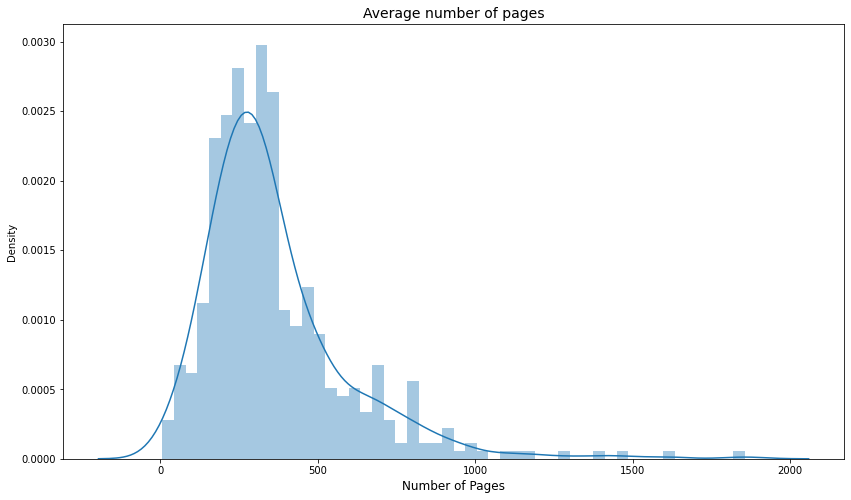

In [15]:
plt.figure(figsize = (14,8))
sns.distplot(df_books['Number of Pages'], bins = 50)
plt.title('Average number of pages', fontsize = 14)
plt.xlabel('Number of Pages', fontsize = 12)
plt.show()

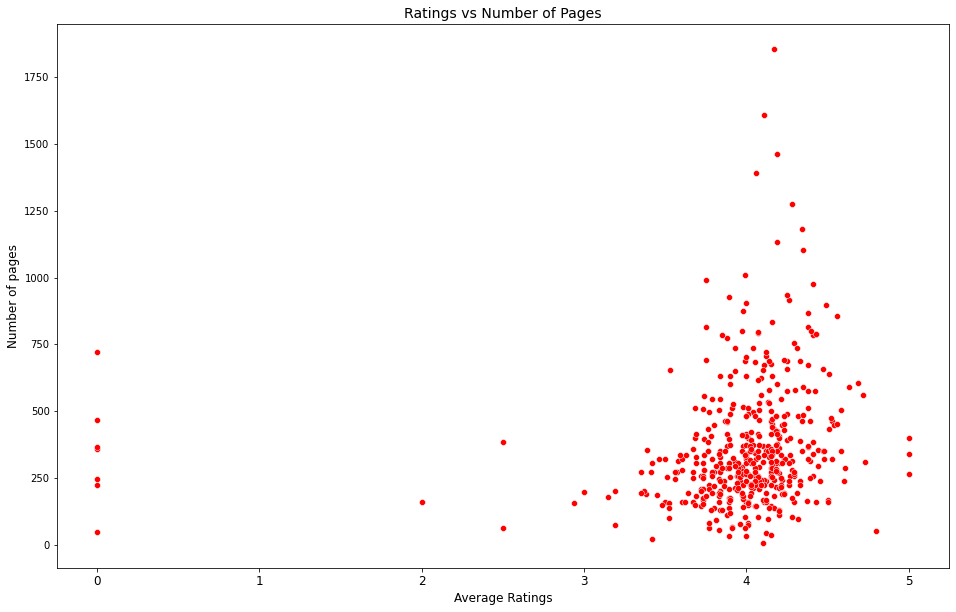

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'Average Rating', y = 'Number of Pages', data = df_books, color = 'red')
plt.title('Ratings vs Number of Pages', fontsize = 14)
plt.xticks(fontsize = 12)
plt.ylabel('Number of pages', fontsize = 12)
plt.xlabel('Average Ratings', fontsize = 12)
plt.show()

In [17]:
df_books.rename(columns = {'Number of Pages':'Number_of_Pages'}, inplace = True)

In [18]:
df_books.columns

Index(['Book Id', 'Title', 'Author', 'Author l-f', 'Additional Authors',
       'ISBN', 'ISBN13', 'My Rating', 'Average Rating', 'Publisher', 'Binding',
       'Number_of_Pages', 'Year Published', 'Original Publication Year',
       'Date Read', 'Date Added', 'Bookshelves', 'Bookshelves with positions',
       'Exclusive Shelf', 'My Review', 'Spoiler', 'Private Notes',
       'Read Count', 'Owned Copies'],
      dtype='object')

<Figure size 1152x720 with 0 Axes>

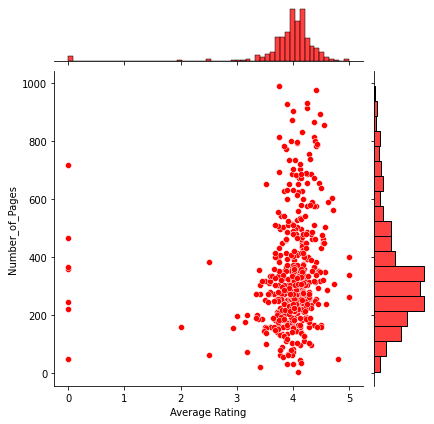

In [19]:
a = df_books.loc[(df_books.Number_of_Pages < 1000)]
plt.figure(figsize=(16,10))
sns.jointplot(x = 'Average Rating', y = 'Number_of_Pages', data = a, color = 'red')
plt.show()

In [20]:
import scipy

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


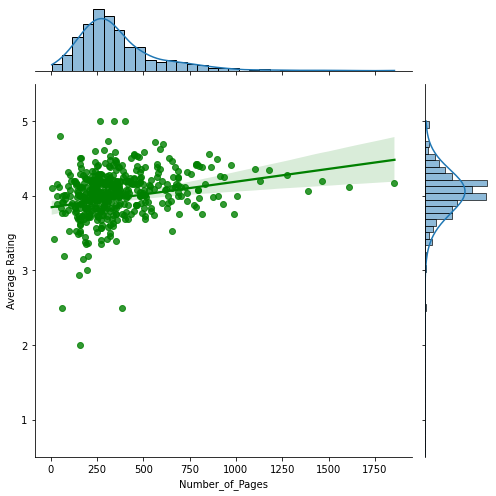

In [21]:
sns.jointplot("Number_of_Pages", "Average Rating", data=df_books, kind="reg", height=7, ylim=[0.5,5.5], joint_kws={'color':'green'})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


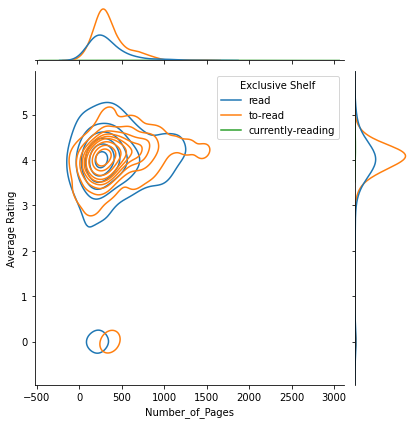

In [22]:
sns.jointplot(data=df_books, x="Number_of_Pages", y="Average Rating", hue="Exclusive Shelf", kind="kde")

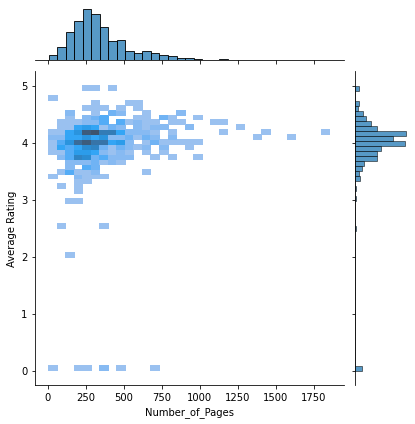

In [23]:
sns.jointplot(data=df_books, x="Number_of_Pages", y="Average Rating", kind="hist")

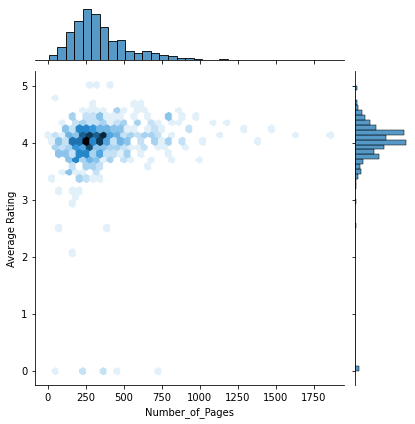

In [24]:
sns.jointplot(data=df_books, x="Number_of_Pages", y="Average Rating", kind="hex")

In [25]:
from collections import defaultdict, Counter

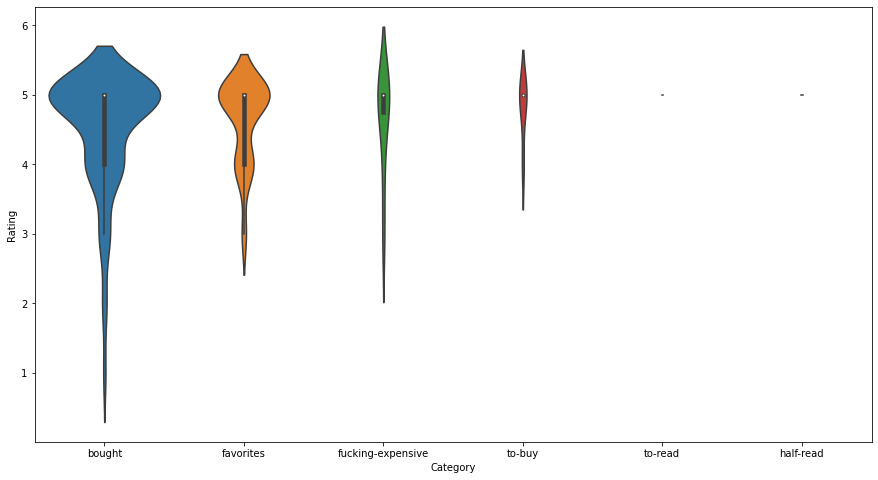

In [26]:
CATEGORIES = 7 # number of most crowded categories to plot

# we have to fiddle a bit - we have to count the ratings by category, 
# since each book can have several comma-delimited categories
# TODO: find a pandas-like way to do this

shelves_ratings = defaultdict(list) # key: shelf-name, value: list of ratings
shelves_counter = Counter() # counts how many books on each shelf
shelves_to_names = defaultdict(list) # key: shelf-name, value: list of book names
for index, row in df_books.iterrows():
    my_rating = row["My Rating"]
    if my_rating == 0:
        continue
    if pd.isnull(row["Bookshelves"]):
        continue

    shelves = row["Bookshelves"].split(",")

    for s in shelves:
        # empty shelf?
        if not s: continue
        s = s.strip() # I had "non-fiction" and " non-fiction"
        shelves_ratings[s].append(my_rating)
        shelves_counter[s] += 10
        shelves_to_names[s].append(row.Title)

names = []
ratings = []
for name, _ in shelves_counter.most_common(CATEGORIES):
    for number in shelves_ratings[name]:
        names.append(name)
        ratings.append(number)

full_table = pd.DataFrame({"Category":names, "Rating":ratings})

# if we don't use scale=count here then each violin has the same area
plt.figure(figsize=(15,8))
sns.violinplot(x = "Category", y = "Rating", data=full_table, scale='count')

In [27]:
dates = pd.to_datetime(df_books["Date Read"])
dates = dates.dropna()
sorted_dates = sorted(dates)

In [28]:
import datetime

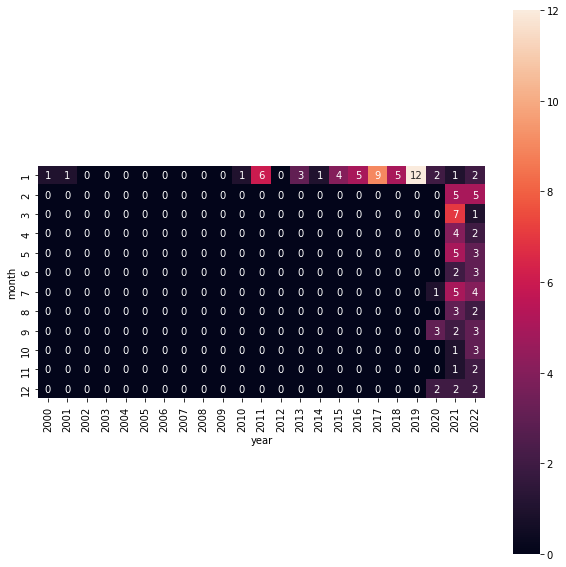

In [29]:
read_dict = defaultdict(int) # key: (year, month), value: count of books read
for date in sorted_dates:
    this_year = date.year
    this_month = date.month
    read_dict[ (this_year, this_month) ] += 1

first_date = sorted_dates[0]

first_year = first_date.year
first_month = first_date.month

todays_date = datetime.datetime.today()
todays_year = todays_date.year
todays_month = todays_date.month

all_years = []
all_months = []
all_counts = []
for year in range(first_year, todays_year+1):
    for month in range(1, 13):
        if (year == todays_year) and month > todays_month:
            # don't count future months
            break
        this_count = read_dict[ (year, month) ]
        all_years.append(year)
        all_months.append(month)
        all_counts.append(this_count)

# now get it in the format heatmap() wants
df = pd.DataFrame( { "month":all_months, "year":all_years, "books_read":all_counts } )
dfp = df.pivot("month", "year", "books_read")

fig, ax = plt.subplots(figsize=(10,10))
# now make the heatmap
ax = sns.heatmap(dfp, annot=True, ax=ax, square= True)

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['number']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


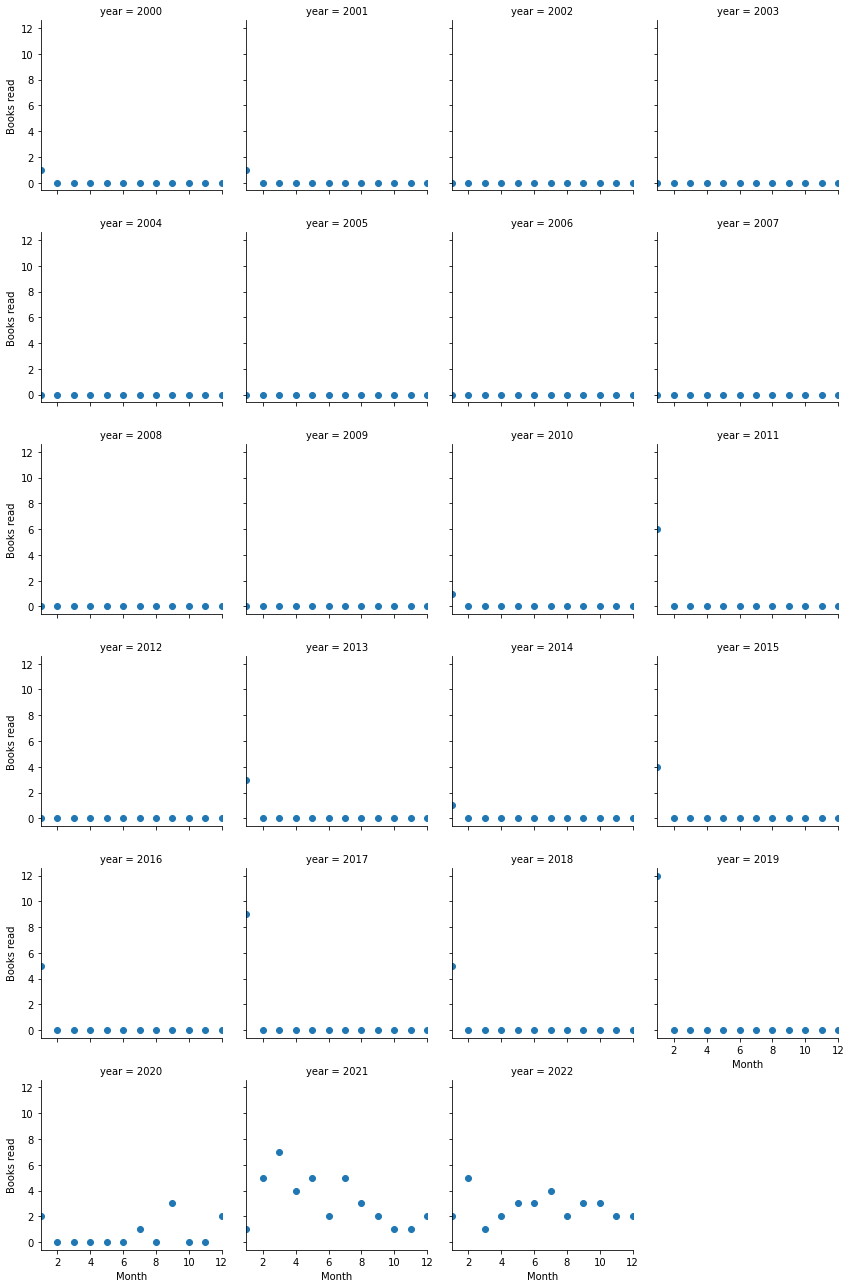

In [31]:
g = sns.FacetGrid(df, col="year", sharey=True, sharex=True, col_wrap=4)
g.map(plt.scatter, "month", "books_read")
g.set_ylabels("Books read")
g.set_xlabels("Month")
pylab.xlim(1, 12)
pylab.show()

In [32]:
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

You have 297 words in 9 reviews


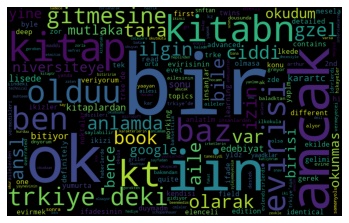

In [34]:
def replace_by_space(word):
    new = []
    for letter in word:
        if letter in REMOVE:
            new.append(' ')
        else:
            new.append(letter)
    return ''.join(new)

STOP = stopwords.words("turkish")
html_clean = re.compile('<.*?>')
gr_clean = re.compile('\[.*?\]')
PRINTABLE = string.printable
REMOVE = set(["!","(",")",":",".",";",",",'"',"?","-",">","_"])

all_my_words = []
all_my_words_with_stop_words = []

reviews = df_books["My Review"]

num_reviews = 0
num_words = 0
for row in reviews:
    if pd.isnull(row):
        continue
    review = row.lower()
    if not review:
        # empty review
        continue
    # clean strings
    cleaned_review = re.sub(html_clean, '', review)
    cleaned_review = re.sub(gr_clean, '', cleaned_review)
    all_my_words_with_stop_words += cleaned_review
    cleaned_review = replace_by_space(cleaned_review)
    cleaned_review = "".join(filter(lambda x: x in PRINTABLE, cleaned_review))
    # clean words
    cleaned_review = cleaned_review.split()
    cleaned_review = list(filter(lambda x: x not in STOP, cleaned_review))
    num_words += len(cleaned_review)
    all_my_words += cleaned_review
    num_reviews += 1

print("You have %s words in %s reviews"%(num_words, num_reviews))

# we need all words later for the Markov chain
all_my_words_with_stop_words = ''.join(all_my_words_with_stop_words)

# WordCloud takes only string, no list/set
wordcloud = WordCloud(max_font_size=200, width=800, height=500).generate(' '.join(all_my_words))
pylab.imshow(wordcloud)
pylab.axis("off")
pylab.show()

In [35]:
import calendar
from collections import OrderedDict

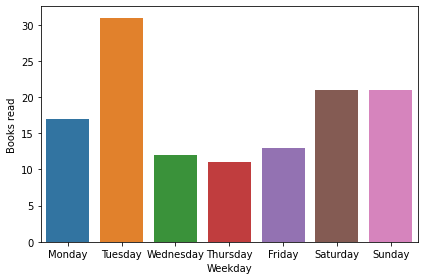

In [36]:
read_dict = OrderedDict() # key: weekday, value: count of books read
for day in range(0,7):
    read_dict[calendar.day_name[day]] = 0

for date in sorted_dates:
    weekday_name = calendar.day_name[date.weekday()]  # Sunday
    read_dict[weekday_name] += 1

full_table = pd.DataFrame({"Weekday":list(read_dict.keys()), "Books read":list(read_dict.values())})

sns.barplot(x="Weekday", y="Books read", data=full_table)
plt.tight_layout()
plt.show()